# Problem 2. Gradient Descent Algorithm and Logistic Regression 

## Importing Libraries

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import log, dot, e
from sklearn.model_selection import KFold
import random
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

## Reading the dataset

In [119]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
headers = ['id', 'type', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
dataset = pd.read_csv(url,names = headers)

dataset

,id,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Changes to dataset for ease of use

In [120]:
# Replacing M with 1 and B with 0
dataset = dataset.replace('M',1)
dataset = dataset.replace('B',0)

# Converting to array
y = dataset[dataset.columns[1:2]]
y = y.to_numpy().reshape(len(temp))
X = dataset[dataset.columns[2:]]
X = X.to_numpy()

dataset

,id,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Stochastic  Gradient  Descent

In [121]:
class LR_Stochastic:
    
    # Sigmoid function        
    def _sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # instance variables 
    def __init__(self, lr = 0.0002, iters = 10000):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # initialize parameters
        samples, features = X.shape
        # set weights to zero
        self.weights = np.zeros(features)
        self.bias = 0
        costs = []
        epochs = []
        
        # stochastic gradient descent algorithm
        for i in range(self.iters):
            r_index = random.randint(0,samples - 1)
            
            sample_x = X[r_index]
            sample_y = y[r_index]
            # logistic regression equation values
            linear_model = np.dot(sample_x, self.weights) + self.bias
            # sigmoid values
            y_pred = self._sigmoid(linear_model)
            # derivativation
            dw = (1/samples) * np.dot(sample_x.T,y_pred - sample_y)
            db = (1/samples) * np.sum(y_pred - sample_y)
            # updating the weights
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
            # cost function
            cost = np.square(sample_y-y_pred)
        
            if i%100==0: # at every 100th iteration record the cost and iters value
                costs.append(cost)
                epochs.append(i)
                
        
        return costs,epochs
     
    # Testing the model    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_cls

## Implementing, training, testing, evaluating, recall,  precision,  and  accuracy 

Prediction accuracy: 0.8951048951048951
Precision: 0.975
Recall: 0.736
Accuracy: 0.895
accuracy of each fold - [0.9157894736842105, 0.8894736842105263, 0.9312169312169312]
Avg accuracy : 0.9121600297038893


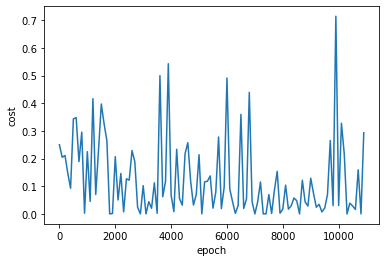

In [122]:
if __name__ == "__main__":
    
    # accuracy of the predictions
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    regressor = LR_Stochastic(lr = 0.0002, iters=11000)
    axisx,axisy = regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    
    print("Prediction accuracy:", accuracy(y_test, predictions))
    
    # Confusion matrix and different scores
    confusionM = [[0,0],[0,0]]
    
    for i in range(len(y_test)):
        if(y_test[i] == 0 and predictions[i] == 0):
            confusionM[0][0] += 1
        if(y_test[i] == 0 and predictions[i] == 1):
            confusionM[0][1] += 1
        if(y_test[i] == 1 and predictions[i] == 0):
            confusionM[1][0] += 1
        if(y_test[i] == 1 and predictions[i] == 1):
            confusionM[1][1] += 1
            
    # true negative, false positive, false negative, true positive
    tn = confusionM[0][0]
    fp = confusionM[0][1]
    fn = confusionM[1][0]
    tp = confusionM[1][1]
    
    precision_score = tp/(fp + tp)
    recall_score = tp/(fn + tp)
    accuracy_score = (tp + tn)/(tp + fn + tn + fp)
    print('Precision: %.3f' % precision_score)
    print('Recall: %.3f' % recall_score)
    print('Accuracy: %.3f' % accuracy_score)
    
    
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.plot(axisy,axisx)
    
    #cross-validation
    kFold = KFold(n_splits=3, random_state=None)
    
    acc_score = []
 
    for train , test in kFold.split(X):
        X_train , X_test = X[train,:],X[test,:]
        y_train , y_test = y[train] , y[test]
     
        regressor.fit(X_train,y_train)
        pred_values = regressor.predict(X_test)
     
        acc = accuracy(pred_values, y_test)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/3
 
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))

#  Mini-Batch gradient  descent

In [123]:
class LR_Mini_Batch:
    
    # Sigmoid function
    def _sigmoid(self, x):
        return 1/(1 + np.exp(-x)) 
    
    # defining instance variables
    def __init__(self, lr = 0.0001, iters = 200, batch_size = 20):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None
        self.batch_size = batch_size
    
    def fit(self, X, y):
        # initialize paramenters
        samples, features = X.shape
        # set all weights equal to 0 and bias equal to 0
        self.weights = np.zeros(features)
        self.bias = 0
        costs = []
        epochs = []
        
        # mini-batch gradient descent algorithm
        for i in range(self.iters):
            r_indices = np.random.permutation(samples)
            sample_x = X[r_indices]
            sample_y = y[r_indices]
            
            # iterations in batches
            for j in range(0,samples,self.batch_size):
                Xt = sample_x[j:j+self.batch_size]
                yt = sample_y[j:j+self.batch_size]
                
                # linear logistic regression equation
                linear_model = np.dot(Xt, self.weights) + self.bias
                
                # sigmoid values
                y_pred = self._sigmoid(linear_model)
                
                # derivativation
                dw = (1/samples) * np.dot(Xt.T,y_pred - yt)
                db = (1/samples) * np.sum(y_pred - yt)
                
                # updating the weights
                self.weights -= self.lr*dw
                self.bias -= self.lr*db
                
                # MeanSquaredError of costs
                cost = np.mean(np.square(yt-y_pred))
        
            if i%10==0: # at every 10th iteration record the cost and iters value
                costs.append(cost)
                epochs.append(i)
                
        
        return costs,epochs
        
    # Testing of model    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model)
        y_pred_cls = [1 if i > 0.5 else 0 for i in y_pred]
        return y_pred_cls

## Implementing, training, testing, evaluating, recall,  precision,  and  accuracy 

Prediction accuracy: 0.8951048951048951
Precision: 0.975
Recall: 0.736
Accuracy: 0.895
accuracy of each fold - [0.8894736842105263, 0.9052631578947369, 0.9259259259259259]
Avg accuracy : 0.9068875893437297


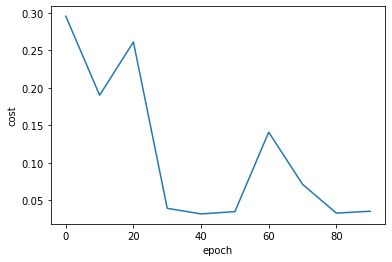

In [124]:
if __name__ == "__main__":
    
    # accuracy of predictions
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    regressor = LR_Mini_Batch(lr = 0.0001, iters=100, batch_size = 10)
    axisx,axisy = regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    
    print("Prediction accuracy:", accuracy(y_test, predictions))
    
    plt.xlabel("epoch")
    plt.ylabel("cost")
    plt.plot(axisy,axisx)
    
    # Confusion matrix and different scores
    confusionM = [[0,0],[0,0]]
    
    for i in range(len(y_test)):
        if(y_test[i] == 0 and predictions[i] == 0):
            confusionM[0][0] += 1
        if(y_test[i] == 0 and predictions[i] == 1):
            confusionM[0][1] += 1
        if(y_test[i] == 1 and predictions[i] == 0):
            confusionM[1][0] += 1
        if(y_test[i] == 1 and predictions[i] == 1):
            confusionM[1][1] += 1
            
    # true negative, false positive, false negative, true positive
    tn = confusionM[0][0]
    fp = confusionM[0][1]
    fn = confusionM[1][0]
    tp = confusionM[1][1]
    
    precision_score = tp/(fp + tp)
    recall_score = tp/(fn + tp)
    accuracy_score = (tp + tn)/(tp + fn + tn + fp)
    print('Precision: %.3f' % precision_score)
    print('Recall: %.3f' % recall_score)
    print('Accuracy: %.3f' % accuracy_score)
    
    
    # cross-validation
    kFold = KFold(n_splits=3, random_state=None)
    
    acc_score = []
 
    for train , test in kFold.split(X):
        X_train , X_test = X[train,:],X[test,:]
        y_train , y_test = y[train] , y[test]
     
        regressor.fit(X_train,y_train)
        pred_values = regressor.predict(X_test)
     
        acc = accuracy(pred_values , y_test)
        acc_score.append(acc)
     
    avg_acc_score = sum(acc_score)/3
 
    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))